In [71]:
from pandas import *
from seaborn import *
from matplotlib.pyplot import *

In [72]:
h19 = read_csv("Hopsital_19-12-2019(raw).csv")

In [73]:
h19["Duration (days)"]=to_numeric(h19["Duration (days)"], errors='coerce')
h19["Age"]=to_numeric(h19["Age"], errors='coerce')
h19["Dosage (gram)"]=to_numeric(h19["Dosage (gram)"], errors='coerce')
h19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              832 non-null    float64
 1   Time             832 non-null    object 
 2   Gender           833 non-null    object 
 3   Diagnosis        833 non-null    object 
 4   Name of Drug     831 non-null    object 
 5   Dosage (gram)    831 non-null    float64
 6   Route            833 non-null    object 
 7   Frequency        833 non-null    object 
 8   Duration (days)  831 non-null    float64
 9   Indication       832 non-null    object 
dtypes: float64(3), object(7)
memory usage: 65.2+ KB


In [74]:
h19.drop(["Time"], axis=1,inplace=True)
h19

,Age,Gender,Diagnosis,Name of Drug,Dosage (gram),Route,Frequency,Duration (days),Indication
0,85.0,Female,"ccf, hypertension, ida, ckd(stage 5), ?icm,",ceftriaxone,1.00,IV,BD,7.0,icm
1,87.0,Female,"pad(lt u.l), be amputation,/post op, akt",ceftriaxone,1.00,IV,BD,1.0,post op
2,82.0,Male,"type-2dm, ihd, col, copd, ht",ofloxacin,0.40,IV,BD,3.0,abd distension with leg swelling
3,82.0,Male,"type-2 dm, ihd, col, copd, ht",cefepime,1.00,IV,BD,5.0,abd distension with leg swelling
4,82.0,Male,"type-2 dm, ihd, col, copd, ht",azithromycin,0.50,Oral,OD,3.0,abd distension with leg swelling
...,...,...,...,...,...,...,...,...,...
828,48.0,Female,"he, rvi with col",rifaximin,0.55,Oral,BD,1.0,vil
829,15.0,Male,"glandular fever, measles, viral encephalitis, ...",ceftriaxone,2.00,IV,BD,2.0,viral encephalitis
830,15.0,Male,"glandular fever, measles, viral encephalitis, ...",Cefixime,0.20,Oral,BD,1.0,viral encephalitis
831,15.0,Male,"glandular fever, measles, viral encephalitis, ...",ceftriaxone,1.00,IV,BD,2.0,viral encephalitis


In [86]:
h19=h19.sort_values(by="Age", ascending=False)
h19.head()

,Age,Gender,Diagnosis,Name of Drug,Dosage (gram),Route,Frequency,Duration (days),Indication
360,90.0,Female,"sick sinus syndrome, ccf, poor drug adherence,...",ceftriaxone,1.0,IV,BD,4.0,dyspnoea
362,90.0,Female,"sick sinus syndrome, ccf, poor drug adherence,...",Cefixime,0.2,Oral,BD,3.0,dyspnoea
618,87.0,Female,"pad(lt u.l), be amputation,/post op, akt",ceftriaxone,1.0,IV,BD,1.0,pad(lt u.l)
1,87.0,Female,"pad(lt u.l), be amputation,/post op, akt",ceftriaxone,1.0,IV,BD,1.0,post op
116,87.0,Female,"pad(lt u.l), be amputation,/post op, akt",ceftriaxone,1.0,IV,BD,1.0,be amputation


In [76]:
h19.dropna(subset=["Indication"],inplace=True)


In [77]:
h19.isnull().sum()

Age                1
Gender             0
Diagnosis          0
Name of Drug       2
Dosage (gram)      2
Route              0
Frequency          0
Duration (days)    2
Indication         0
dtype: int64

In [78]:
h19.head()

,Age,Gender,Diagnosis,Name of Drug,Dosage (gram),Route,Frequency,Duration (days),Indication
360,90.0,Female,"sick sinus syndrome, ccf, poor drug adherence,...",ceftriaxone,1.0,IV,BD,4.0,dyspnoea
362,90.0,Female,"sick sinus syndrome, ccf, poor drug adherence,...",Cefixime,0.2,Oral,BD,3.0,dyspnoea
618,87.0,Female,"pad(lt u.l), be amputation,/post op, akt",ceftriaxone,1.0,IV,BD,1.0,pad(lt u.l)
1,87.0,Female,"pad(lt u.l), be amputation,/post op, akt",ceftriaxone,1.0,IV,BD,1.0,post op
116,87.0,Female,"pad(lt u.l), be amputation,/post op, akt",ceftriaxone,1.0,IV,BD,1.0,be amputation


<Axes: xlabel='Frequency', ylabel='Name of Drug'>

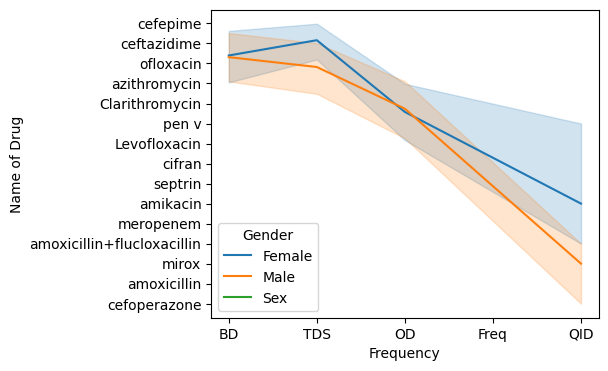

In [91]:
figure(figsize=(5,4))
lineplot(x="Frequency", y="Name of Drug", hue="Gender", data=h19)

(0.0, 60.0)

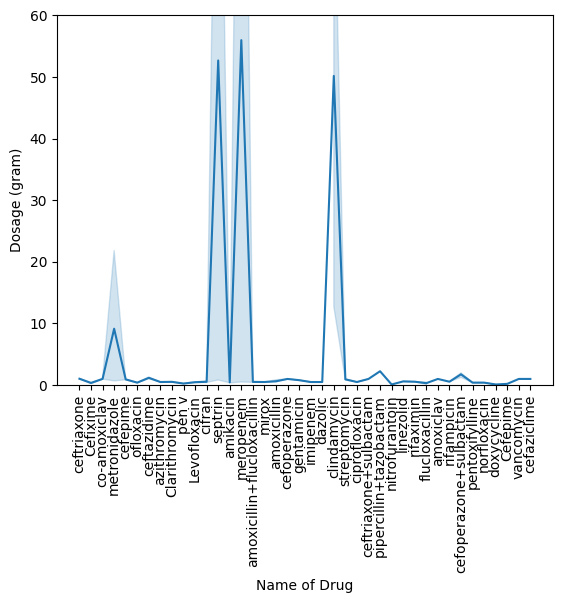

In [80]:
lineplot(x="Name of Drug", y="Dosage (gram)", data=h19)
xticks(rotation=90)
ylim(0,60) 

In [81]:
h19.to_csv("Hopsital_19-12-2019(new).csv", index=False)

<Axes: xlabel='Dosage (gram)', ylabel='Age'>

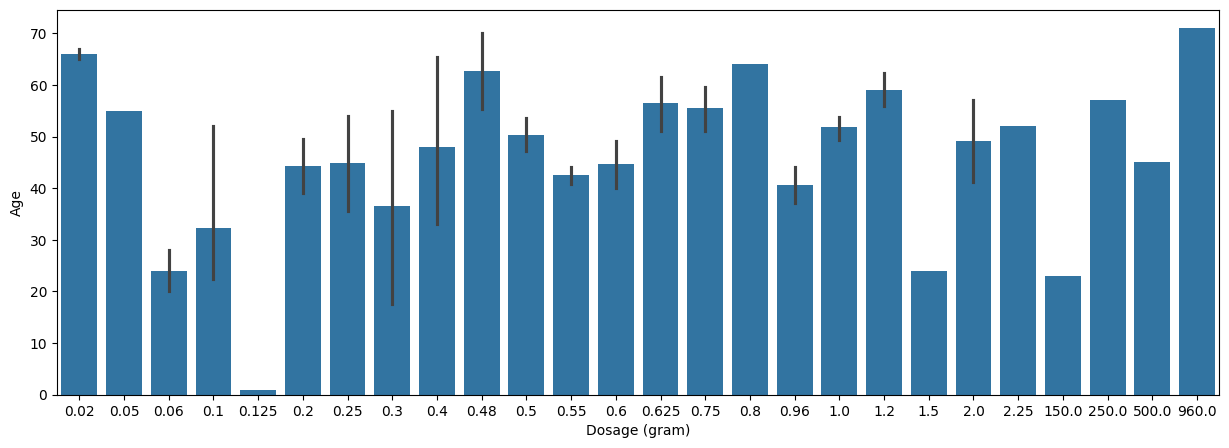

In [82]:
figure(figsize=(15,5))
barplot(x='Dosage (gram)',y="Age", data=h19)

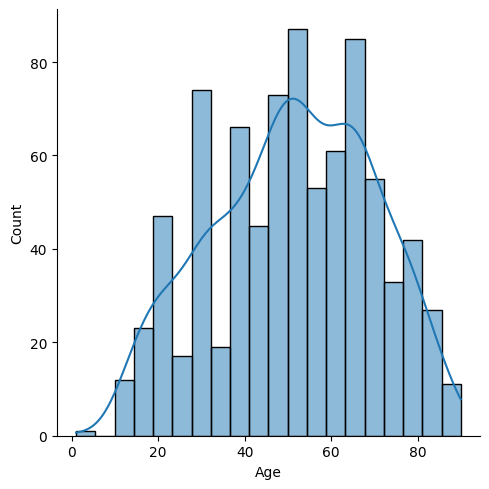

In [83]:
displot(h19['Age'], kde=True, bins=20)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'ceftriaxone'),
  Text(1, 0, 'Cefixime'),
  Text(2, 0, 'co-amoxiclav'),
  Text(3, 0, 'metronidazole'),
  Text(4, 0, 'cefepime'),
  Text(5, 0, 'ofloxacin'),
  Text(6, 0, 'ceftazidime'),
  Text(7, 0, 'azithromycin'),
  Text(8, 0, 'Clarithromycin'),
  Text(9, 0, 'pen v'),
  Text(10, 0, 'Levofloxacin'),
  Text(11, 0, 'cifran'),
  Text(12, 0, 'septrin'),
  Text(13, 0, 'amikacin'),
  Text(14, 0, 'meropenem'),
  Text(15, 0, 'amoxicillin+flucloxacillin'),
  Text(16, 0, 'mirox'),
  Text(17, 0, 'amoxicillin'),
  Text(18, 0, 'cefoperazone'),
  Text(19, 0, 'gentamicin'),
  Text(20, 0, 'imipenem'),
  Text(21, 0, 'dazolic'),
  Text(22, 0, 'clindamycin'),
  Text(23, 0, 'streptomycin'),
  Text(24, 0, 'ciprofloxacin'),
  Text(25, 0, 'ceftriaxone+sulbactam'),
  Te

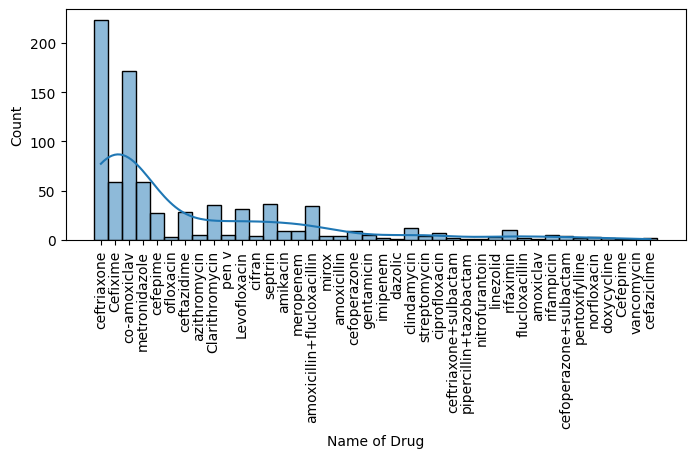

In [84]:
figure(figsize=(8,3))
histplot(h19['Name of Drug'], kde=True, bins=15)
xticks(rotation=90)

In [ ]:
figure(figsize=(5,4))
lineplot(x="Frequency", y="Name of Drug", hue="Gender", data=h19)

lineplot(x="Name of Drug", y="Dosage (gram)", data=h19)
xticks(rotation=90)
ylim(0,60) 

figure(figsize=(15,5))
barplot(x='Dosage (gram)',y="Age", data=h19)

displot(h19['Age'], kde=True, bins=20)

figure(figsize=(8,3))
histplot(h19['Name of Drug'], kde=True, bins=15)
xticks(rotation=90)